In [1]:
#!python -m pip install numpy==1.20.0
#!pip install pandas-profiling

In [2]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np

from sklearn.model_selection import train_test_split

In [3]:
np.__version__

'1.20.0'

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# 1- Import dataset

In [4]:
#Load Data
df1=pd.read_csv("./Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("./Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("./Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("./Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("./Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("./Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("./Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("./Wednesday-workingHours.pcap_ISCX.csv")

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3229: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3229: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [17]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8])

In [18]:
df.shape

(2830743, 79)

# 2- Tratamentos iniciais

In [22]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [23]:
df.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,bwd_packet_length_min,bwd_packet_length_mean,bwd_packet_length_std,flow_bytes/s,flow_packets/s,flow_iat_mean,flow_iat_std,flow_iat_max,flow_iat_min,fwd_iat_total,fwd_iat_mean,fwd_iat_std,fwd_iat_max,fwd_iat_min,bwd_iat_total,bwd_iat_mean,bwd_iat_std,bwd_iat_max,bwd_iat_min,fwd_psh_flags,bwd_psh_flags,fwd_urg_flags,bwd_urg_flags,fwd_header_length,bwd_header_length,fwd_packets/s,bwd_packets/s,min_packet_length,max_packet_length,packet_length_mean,packet_length_std,packet_length_variance,fin_flag_count,syn_flag_count,rst_flag_count,psh_flag_count,ack_flag_count,urg_flag_count,cwe_flag_count,ece_flag_count,down/up_ratio,average_packet_size,avg_fwd_segment_size,avg_bwd_segment_size,fwd_header_length.1,fwd_avg_bytes/bulk,fwd_avg_packets/bulk,fwd_avg_bulk_rate,bwd_avg_bytes/bulk,bwd_avg_packets/bulk,bwd_avg_bulk_rate,subflow_fwd_packets,subflow_fwd_bytes,subflow_bwd_packets,subflow_bwd_bytes,init_win_bytes_forward,init_win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4000000,666666.6667,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,110091.7431,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,230769.2308,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,352941.1765,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4000000,666666.6667,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [24]:
df['flow_bytes/s'] = df['flow_bytes/s'].replace([np.nan,",,"],0)
df['flow_packets/s'] = df['flow_packets/s'].replace([np.nan,",,"],0)

### 2.1 - Split dataset

In [25]:
train, test  = train_test_split(df, test_size=0.3, random_state=4, stratify=df['label'])

In [26]:
train.groupby(by=['label'])['label'].count()

label
BENIGN                        1591168
Bot                              1376
DDoS                            89619
DoS GoldenEye                    7205
DoS Hulk                       161751
DoS Slowhttptest                 3849
DoS slowloris                    4057
FTP-Patator                      5557
Heartbleed                          8
Infiltration                       25
PortScan                       111251
SSH-Patator                      4128
Web Attack � Brute Force         1055
Web Attack � Sql Injection         15
Web Attack � XSS                  456
Name: label, dtype: int64

In [27]:
test.groupby(by=['label'])['label'].count()

label
BENIGN                        681929
Bot                              590
DDoS                           38408
DoS GoldenEye                   3088
DoS Hulk                       69322
DoS Slowhttptest                1650
DoS slowloris                   1739
FTP-Patator                     2381
Heartbleed                         3
Infiltration                      11
PortScan                       47679
SSH-Patator                     1769
Web Attack � Brute Force         452
Web Attack � Sql Injection         6
Web Attack � XSS                 196
Name: label, dtype: int64

### 2.2- Dados nan e infinito

In [30]:
#train["flow_bytes/s"][train["flow_bytes/s"] != "Infinity"].apply(pd.to_numeric).max() = 2071000000
#train["flow_packets/s"][train["flow_packets/s"] != "Infinity"].apply(pd.to_numeric).max() = 4000000

train.loc[train['flow_bytes/s'] == "Infinity", 'flow_bytes/s'] = 2071000000
train.loc[train['flow_packets/s'] == "Infinity", 'flow_packets/s'] = 4000000

test.loc[test['flow_bytes/s'] == "Infinity", 'flow_bytes/s'] = 2071000000
test.loc[test['flow_packets/s'] == "Infinity", 'flow_packets/s'] = 4000000

train['flow_bytes/s'] = train['flow_bytes/s'].apply(pd.to_numeric) 
train['flow_packets/s'] = train['flow_packets/s'].apply(pd.to_numeric) 

test['flow_bytes/s'] = test['flow_bytes/s'].apply(pd.to_numeric) 
test['flow_packets/s'] = test['flow_packets/s'].apply(pd.to_numeric) 

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [31]:
# Salvar os dados:
train.to_csv('train.csv');
test.to_csv('test.csv')

# 3- EDA

In [35]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np


In [36]:
train = pd.read_csv("train.csv")
train.set_index("Unnamed: 0", inplace = True)

In [37]:
train.head()

,destination_port,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
147239,80,98796771,7,6,373,11595,373,0,53.285714,140.980748,...,32,985.0,0.000000,985,985,98600000.0,0.000000e+00,98600000,98600000,DoS Hulk
257123,443,65932083,11,11,864,6201,421,0,78.545455,140.428176,...,32,414759.0,0.000000,414759,414759,60500000.0,0.000000e+00,60500000,60500000,BENIGN
680307,443,1,2,0,12,0,6,6,6.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,BENIGN
365325,6888,57,1,1,6,6,6,6,6.000000,0.000000,...,20,0.0,0.000000,0,0,0.0,0.000000e+00,0,0,BENIGN
35501,53,119395451,3,3,146,523,56,45,48.666667,6.350853,...,20,263092.0,302356.031208,476890,49294,59238046.0,5.089192e+07,95224069,23252023,BENIGN


In [38]:
train.shape

(1981520, 79)

### 3.1 - Transformações

In [39]:
X = train[train.columns.drop('label')]
X_cont = X[X.columns.drop('destination_port')]
X_cat = X['destination_port']
X_dum = train[['destination_port','label']]
Y = train['label']

In [49]:
X_dum.shape

(1981520, 2)

#### 3.1.1 - Transformação LOG para tratar cauda dos dados

In [40]:
X_cont.columns

Index(['flow_duration', 'total_fwd_packets', 'total_backward_packets',
       'total_length_of_fwd_packets', 'total_length_of_bwd_packets',
       'fwd_packet_length_max', 'fwd_packet_length_min',
       'fwd_packet_length_mean', 'fwd_packet_length_std',
       'bwd_packet_length_max', 'bwd_packet_length_min',
       'bwd_packet_length_mean', 'bwd_packet_length_std', 'flow_bytes/s',
       'flow_packets/s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max',
       'flow_iat_min', 'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std',
       'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean',
       'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags',
       'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance', 'fin_flag_count',
       'syn_flag_count', 'rst_flag_count', 'ps

In [41]:
X_cont_log= np.log(np.abs(X_cont)+1)

In [42]:
X_cont_log.head()

,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,...,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
147239,18.408575,2.079442,1.945910,5.924256,9.358415,5.924256,0.000000,3.994261,4.955691,8.376781,...,0.693147,3.496508,6.893656,0.000000,6.893656,6.893656,18.406582,0.000000,18.406582,18.406582
257123,18.004136,2.484907,2.484907,6.762730,8.732627,6.045005,0.000000,4.376329,4.951792,7.278629,...,1.791759,3.496508,12.935455,0.000000,12.935455,12.935455,17.918154,0.000000,17.918154,17.918154
680307,0.693147,1.098612,0.000000,2.564949,0.000000,1.945910,1.945910,1.945910,0.000000,0.000000,...,0.693147,3.044522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
365325,4.060443,0.693147,0.693147,1.945910,1.945910,1.945910,1.945910,1.945910,0.000000,1.945910,...,0.000000,3.044522,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35501,18.597952,1.386294,1.386294,4.990433,6.261492,4.043051,3.828641,3.905334,1.994816,5.361292,...,1.098612,3.044522,12.480263,12.619364,13.075043,10.805578,17.897075,17.745215,18.371743,16.961903


#### 3.1.2 - Transformação min-max scale

In [56]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
X_cont_scaled = pd.DataFrame(scaler.fit_transform(X_cont_log), index=X_cont_log.index)
X_cont_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
147239,0.989549,0.119435,0.154631,0.361837,0.460987,0.585433,0.000000,0.459651,0.558602,0.847873,...,0.056484,0.173945,0.372308,0.000000,0.372308,0.372308,0.989441,0.000000,0.989441,0.989441
257123,0.967808,0.154367,0.197462,0.413048,0.430161,0.597365,0.000000,0.503618,0.558163,0.736721,...,0.146008,0.173945,0.698610,0.000000,0.698610,0.698610,0.963186,0.000000,0.963186,0.963186
680307,0.037260,0.034932,0.000000,0.156660,0.000000,0.192294,0.251023,0.223931,0.000000,0.000000,...,0.056484,0.151459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
365325,0.218268,0.000000,0.055081,0.118851,0.095854,0.192294,0.251023,0.223931,0.000000,0.196959,...,0.000000,0.151459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35501,0.999729,0.059717,0.110161,0.304801,0.308435,0.399533,0.493897,0.449417,0.224854,0.542654,...,0.089524,0.151459,0.674026,0.696345,0.706149,0.583581,0.962053,0.977266,0.987569,0.911783


In [57]:
X_cont_scaled.rename(columns={
0:'flow_duration', 
1:'total_fwd_packets',
2:'total_backward_packets', 
3:'total_length_of_fwd_packets',
4:'total_length_of_bwd_packets', 
5:'fwd_packet_length_max',
6:'fwd_packet_length_min',
7:'fwd_packet_length_mean',
8:'fwd_packet_length_std', 
9:'bwd_packet_length_max',
10:'bwd_packet_length_min', 
11:'bwd_packet_length_mean',
12:'bwd_packet_length_std', 
13:'flow_bytes/s', 
14:'flow_packets/s',
15:'flow_iat_mean', 
16:'flow_iat_std', 
17:'flow_iat_max', 
18:'flow_iat_min',
19:'fwd_iat_total', 
20:'fwd_iat_mean', 
21:'fwd_iat_std', 
22:'fwd_iat_max',
23:'fwd_iat_min', 
24:'bwd_iat_total', 
25:'bwd_iat_mean', 
26:'bwd_iat_std',
27:'bwd_iat_max', 
28:'bwd_iat_min', 
29:'fwd_psh_flags', 
30:'bwd_psh_flags',
31:'fwd_urg_flags', 
32:'bwd_urg_flags', 
33:'fwd_header_length',
34:'bwd_header_length', 
35:'fwd_packets/s', 
36:'bwd_packets/s',
37:'min_packet_length',
38:'max_packet_length', 
39:'packet_length_mean',
40:'packet_length_std',
41:'packet_length_variance', 
42:'fin_flag_count',
43:'syn_flag_count',
44:'rst_flag_count', 
45:'psh_flag_count', 
46:'ack_flag_count',
47:'urg_flag_count', 
48:'cwe_flag_count',
49:'ece_flag_count', 
50:'down/up_ratio',
51:'average_packet_size',
52:'avg_fwd_segment_size', 
53:'avg_bwd_segment_size',
54:'fwd_header_length.1',
55:'fwd_avg_bytes/bulk',
56:'fwd_avg_packets/bulk',
57:'fwd_avg_bulk_rate',
58:'bwd_avg_bytes/bulk',
59:'bwd_avg_packets/bulk',
60:'bwd_avg_bulk_rate',
61:'subflow_fwd_packets',
62:'subflow_fwd_bytes',
63:'subflow_bwd_packets',
64:'subflow_bwd_bytes', 
65:'init_win_bytes_forward',
66:'init_win_bytes_backward', 
67:'act_data_pkt_fwd', 
68:'min_seg_size_forward',
69:'active_mean',
70:'active_std', 
71:'active_max', 
72:'active_min',
73:'idle_mean',
74:'idle_std', 
75:'idle_max',
76:'idle_min'
},inplace=True)

In [58]:
X_cont_scaled.head()

,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,...,act_data_pkt_fwd,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
147239,0.989549,0.119435,0.154631,0.361837,0.460987,0.585433,0.000000,0.459651,0.558602,0.847873,...,0.056484,0.173945,0.372308,0.000000,0.372308,0.372308,0.989441,0.000000,0.989441,0.989441
257123,0.967808,0.154367,0.197462,0.413048,0.430161,0.597365,0.000000,0.503618,0.558163,0.736721,...,0.146008,0.173945,0.698610,0.000000,0.698610,0.698610,0.963186,0.000000,0.963186,0.963186
680307,0.037260,0.034932,0.000000,0.156660,0.000000,0.192294,0.251023,0.223931,0.000000,0.000000,...,0.056484,0.151459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
365325,0.218268,0.000000,0.055081,0.118851,0.095854,0.192294,0.251023,0.223931,0.000000,0.196959,...,0.000000,0.151459,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
35501,0.999729,0.059717,0.110161,0.304801,0.308435,0.399533,0.493897,0.449417,0.224854,0.542654,...,0.089524,0.151459,0.674026,0.696345,0.706149,0.583581,0.962053,0.977266,0.987569,0.911783


#### 3.1.3 - Avaliação da variável porta para identificar associação com tipos de ataques

In [28]:
def percConvert(ser):
    return ser/float(ser[-1])

pd.crosstab(X_dum["destination_port"],X_dum["label"],margins=True).apply(percConvert, axis=1).to_csv('cross_tab.csv')

In [59]:
train_v2 = pd.concat([X_cont_scaled,X_dum], axis=1)

In [60]:
train_v2.shape

(1981520, 79)

In [61]:
train_v2.head()

,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,...,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,destination_port,label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
147239,0.989549,0.119435,0.154631,0.361837,0.460987,0.585433,0.000000,0.459651,0.558602,0.847873,...,0.372308,0.000000,0.372308,0.372308,0.989441,0.000000,0.989441,0.989441,80,DoS Hulk
257123,0.967808,0.154367,0.197462,0.413048,0.430161,0.597365,0.000000,0.503618,0.558163,0.736721,...,0.698610,0.000000,0.698610,0.698610,0.963186,0.000000,0.963186,0.963186,443,BENIGN
680307,0.037260,0.034932,0.000000,0.156660,0.000000,0.192294,0.251023,0.223931,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,443,BENIGN
365325,0.218268,0.000000,0.055081,0.118851,0.095854,0.192294,0.251023,0.223931,0.000000,0.196959,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6888,BENIGN
35501,0.999729,0.059717,0.110161,0.304801,0.308435,0.399533,0.493897,0.449417,0.224854,0.542654,...,0.674026,0.696345,0.706149,0.583581,0.962053,0.977266,0.987569,0.911783,53,BENIGN


#### 3.1.4 - Agrupamento do Target

##### Source: Kurniabudi, D. Stiawan, Darmawijoyo, M. Y. Bin Idris, A. M. Bamhdi and R. Budiarto, "CICIDS-2017 Dataset Feature Analysis With Information Gain for Anomaly Detection," in IEEE Access, vol. 8, pp. 132911-132921, 2020, doi: 10.1109/ACCESS.2020.3009843.

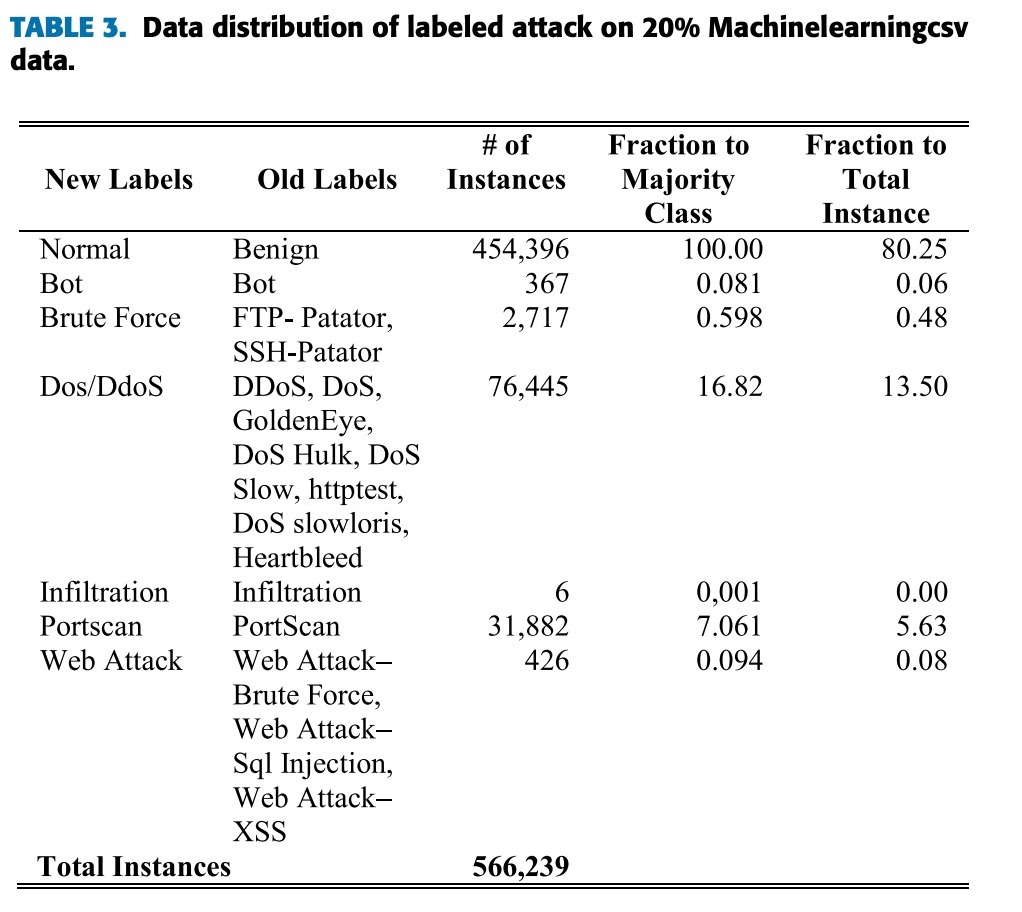

In [67]:
from IPython.display import Image
Image("target_group.png", width=500, height=500)

In [76]:
train_v2["label"].unique()

array(['DoS Hulk', 'BENIGN', 'PortScan', 'DoS Slowhttptest', 'DDoS',
       'DoS slowloris', 'DoS GoldenEye', 'FTP-Patator', 'SSH-Patator',
       'Web Attack � Brute Force', 'Web Attack � XSS', 'Bot',
       'Heartbleed', 'Web Attack � Sql Injection', 'Infiltration'],
      dtype=object)

In [100]:
train_v2['new_label'] = \
np.where(train_v2['label'].isin(['BENIGN']), 'Normal', \
np.where(train_v2['label'].isin(['Bot']), 'Bot', \
np.where(train_v2['label'].isin(['FTP-Patator', 'SSH-Patator']), 'Brute Force', \
np.where(train_v2['label'].isin(['DoS Hulk','DoS Slowhttptest','DoS Slowhttptest', 'DDoS','DoS slowloris', 'DoS GoldenEye','Heartbleed']), 'DoS/DdoS', \
np.where(train_v2['label'].isin(['Infiltration']), 'Infiltration', \
np.where(train_v2['label'].isin(['PortScan']), 'PortScan', \
np.where(train_v2['label'].isin(['Web Attack � Brute Force', 'Web Attack � XSS','Web Attack � Sql Injection']), 'Web Attack','Error')))))))     
         

In [101]:
train_v2.head()

,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,...,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,destination_port,label,new_label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
147239,0.989549,0.119435,0.154631,0.361837,0.460987,0.585433,0.000000,0.459651,0.558602,0.847873,...,0.000000,0.372308,0.372308,0.989441,0.000000,0.989441,0.989441,80,DoS Hulk,DoS/DdoS
257123,0.967808,0.154367,0.197462,0.413048,0.430161,0.597365,0.000000,0.503618,0.558163,0.736721,...,0.000000,0.698610,0.698610,0.963186,0.000000,0.963186,0.963186,443,BENIGN,Normal
680307,0.037260,0.034932,0.000000,0.156660,0.000000,0.192294,0.251023,0.223931,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,443,BENIGN,Normal
365325,0.218268,0.000000,0.055081,0.118851,0.095854,0.192294,0.251023,0.223931,0.000000,0.196959,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6888,BENIGN,Normal
35501,0.999729,0.059717,0.110161,0.304801,0.308435,0.399533,0.493897,0.449417,0.224854,0.542654,...,0.696345,0.706149,0.583581,0.962053,0.977266,0.987569,0.911783,53,BENIGN,Normal


In [103]:
pd.crosstab(train_v2["new_label"],train_v2["label"],margins=True)

label,BENIGN,Bot,DDoS,DoS GoldenEye,DoS Hulk,DoS Slowhttptest,DoS slowloris,FTP-Patator,Heartbleed,Infiltration,PortScan,SSH-Patator,Web Attack � Brute Force,Web Attack � Sql Injection,Web Attack � XSS,All
new_label,,,,,,,,,,,,,,,,
Bot,0,1376,0,0,0,0,0,0,0,0,0,0,0,0,0,1376
Brute Force,0,0,0,0,0,0,0,5557,0,0,0,4128,0,0,0,9685
DoS/DdoS,0,0,89619,7205,161751,3849,4057,0,8,0,0,0,0,0,0,266489
Infiltration,0,0,0,0,0,0,0,0,0,25,0,0,0,0,0,25
Normal,1591168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1591168
PortScan,0,0,0,0,0,0,0,0,0,0,111251,0,0,0,0,111251
Web Attack,0,0,0,0,0,0,0,0,0,0,0,0,1055,15,456,1526
All,1591168,1376,89619,7205,161751,3849,4057,5557,8,25,111251,4128,1055,15,456,1981520


In [106]:
del train_v2['label']

In [107]:
train_v2.head()

,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,bwd_packet_length_max,...,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,destination_port,new_label
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
147239,0.989549,0.119435,0.154631,0.361837,0.460987,0.585433,0.000000,0.459651,0.558602,0.847873,...,0.372308,0.000000,0.372308,0.372308,0.989441,0.000000,0.989441,0.989441,80,DoS/DdoS
257123,0.967808,0.154367,0.197462,0.413048,0.430161,0.597365,0.000000,0.503618,0.558163,0.736721,...,0.698610,0.000000,0.698610,0.698610,0.963186,0.000000,0.963186,0.963186,443,Normal
680307,0.037260,0.034932,0.000000,0.156660,0.000000,0.192294,0.251023,0.223931,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,443,Normal
365325,0.218268,0.000000,0.055081,0.118851,0.095854,0.192294,0.251023,0.223931,0.000000,0.196959,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6888,Normal
35501,0.999729,0.059717,0.110161,0.304801,0.308435,0.399533,0.493897,0.449417,0.224854,0.542654,...,0.674026,0.696345,0.706149,0.583581,0.962053,0.977266,0.987569,0.911783,53,Normal


In [108]:
train_v2.to_csv('train_v2.csv')